# 5-1 卷積神經網路 CNN

### 程式 5.1 初始化一個小型卷積神經網路 (convnet)

In [1]:
from keras import layers  # 從 keras 套件匯入 layers, models 套件
from keras import models

model = models.Sequential() 
		     #過濾器數量 ↓      ↓過濾器長寬
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 加入 Covn2d 層
model.add(layers.MaxPooling2D((2, 2))) # 進行 MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

### 程式 5.2 在卷積神經網路上加入分類器

In [2]:
model.add(layers.Flatten())  # 將 3D 張量展開攤平為 1D, 其 shape = (576, )
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### 程式 5.3 用 MNIST 影像訓練卷積神經網路

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
938/938 [==============================] - 41s 43ms/step - loss: 0.1660 - accuracy: 0.9478
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0454 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0317 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 42s 44ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0181 - accuracy: 0.9945


### 用測試資料來評估 model

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 4s 12ms/step - loss: 0.0286 - accuracy: 0.9920


0.9919999837875366

# 5-2 以少量資料集從頭訓練一個卷積神經網路

### 程式 5.4 複製圖片到訓練、驗證和測試集目錄

In [29]:
import os, shutil

# 解壓縮資料夾所在的目錄路徑
original_dataset_dir_dogs = r'C:\Users\User\Desktop\python\archive\PetImages\Dog' 
original_dataset_dir_cats = r'C:\Users\User\Desktop\python\archive\PetImages\Cat'
# 用來儲存少量資料集的目錄位置
base_dir = r'C:\Users\User\Desktop\python\archive\PetImages' 
if not os.path.isdir(base_dir): os.mkdir(base_dir)  # 如果目錄不存在, 才建立目錄

# 分拆成訓練、驗證與測試目錄位置
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')  
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir): 
    os.mkdir(train_cats_dir) # 用來訓練貓圖片的目錄位置

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir): 
    os.mkdir(train_dogs_dir) # 用來訓練狗圖片的目錄位置

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir): 
    os.mkdir(validation_cats_dir) # 用來驗證貓圖片的目錄位置

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir): 
    os.mkdir(validation_dogs_dir) # 用來驗證狗圖片的目錄位置

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir): 
    os.mkdir(test_cats_dir) # 用來測試貓圖片的目錄位置

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir): 
    os.mkdir(test_dogs_dir) # 用來測試狗圖片的目錄位置




# 複製前面 1000 張貓圖片到 train_cats_dir 訓練目錄
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 validation_cats_dir 驗證目錄
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 test_cats_dir 測試目錄
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製前面 1000 張狗圖片到 train_dogs_dir 訓練目錄
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 validation_dogs_dir 驗證目錄
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 test_dogs_dir 測試目錄
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('複製完成')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\python\\archive\\PetImages\\Cat\\666.jpg'

### 我們計算每個訓練/驗證/測試分組中的圖片數量，做為資料完整性的檢查：

In [14]:
print('訓練用的貓照片張數:', len(os.listdir(train_cats_dir)))
print('訓練用的狗照片張數:', len(os.listdir(train_dogs_dir)))
print('驗證用的貓照片張數:', len(os.listdir(validation_cats_dir)))
print('驗證用的狗照片張數:', len(os.listdir(validation_dogs_dir)))
print('測試用的貓照片張數:', len(os.listdir(test_cats_dir)))
print('測試用的狗照片張數:', len(os.listdir(test_dogs_dir)))

訓練用的貓照片張數: 1000
訓練用的狗照片張數: 1000
驗證用的貓照片張數: 500
驗證用的狗照片張數: 500
測試用的貓照片張數: 500
測試用的狗照片張數: 500


### 程式 5.5 為狗 vs. 貓分類實作的一個小型的卷積神經網路

In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()  # 查看模型摘要

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 17, 17, 128)      

### 程式 5.6 配置 model 以進行訓練

In [17]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### 程式 5.7 使用 ImageDataGenerator 產生器從目錄中讀取影像

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #設定訓練、測試資料的 Python 產生器，並將圖片像素值依 1/255 比例重新壓縮到 [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # 目標目錄
    target_size=(150, 150),  # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='binary')    # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 看看產生器的輸出結果

In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### 程式 5.8 調整 model 以使用批次量產生器

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 53s 529ms/step - loss: 0.5623 - acc: 0.7105 - val_loss: 0.6284 - val_acc: 0.6420
Epoch 2/30
100/100 [==============================] - 45s 455ms/step - loss: 0.5456 - acc: 0.7085 - val_loss: 0.5949 - val_acc: 0.6650
Epoch 3/30
100/100 [==============================] - 46s 464ms/step - loss: 0.5271 - acc: 0.7320 - val_loss: 0.5852 - val_acc: 0.6850
Epoch 4/30
100/100 [==============================] - 45s 452ms/step - loss: 0.5006 - acc: 0.7500 - val_loss: 0.5831 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 45s 449ms/step - loss: 0.4793 - acc: 0.7635 - val_loss: 0.5777 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 50s 496ms/step - loss: 0.4653 - acc: 0.7805 - val_loss: 0.6084 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 47s 468ms/step - loss: 0.4432 - acc: 0.7995 - val_loss: 0.5933 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 5

In [27]:
from PIL import Image
import os

def find_unreadable_images(folder_path):
    unreadable_images = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # 檢驗圖片是否完整
        except (IOError, SyntaxError) as e:
            unreadable_images.append(filename)

    return unreadable_images

folder_path = original_dataset_dir_cats
unreadable_images = find_unreadable_images(folder_path)

if len(unreadable_images) > 0:
    print("無法讀取的圖片：")
    for img in unreadable_images:
        print(img)
else:
    print("所有圖片都可以讀取。")

無法讀取的圖片：
666.jpg
Thumbs.db


### 程式 5.9 儲存model

In [31]:
model.save('cats_and_dogs_small_1.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 程式 5.10 顯示訓練和驗證週期的損失值和準確度曲線

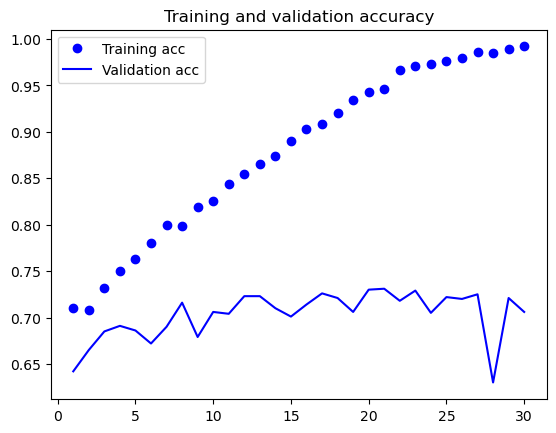

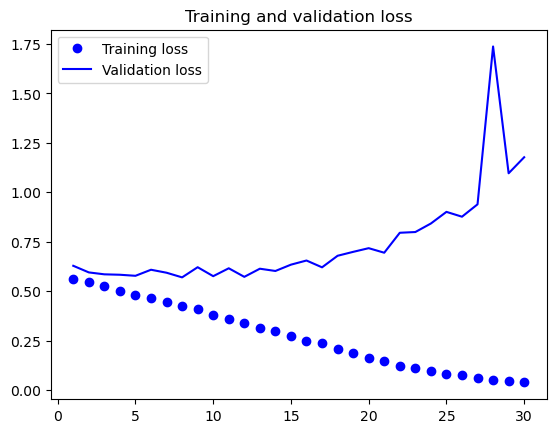

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 程式 5.11 透過 ImageDataGenerator 設定資料擴增

In [33]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

### 程式 5.12 顯示一些隨機擴充的訓練影像

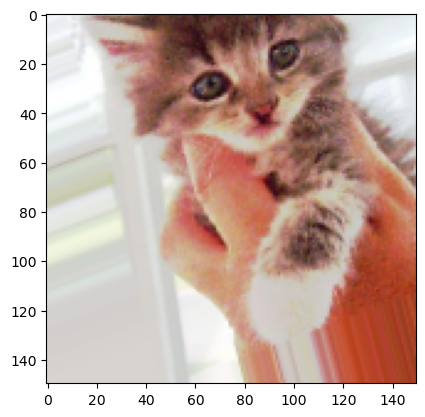

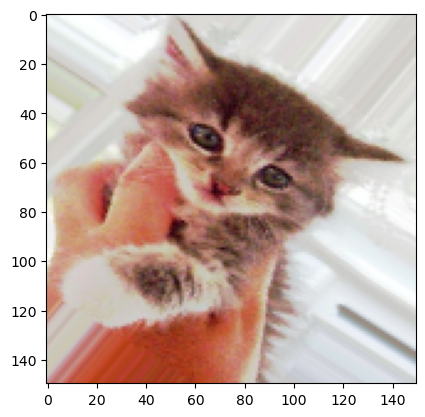

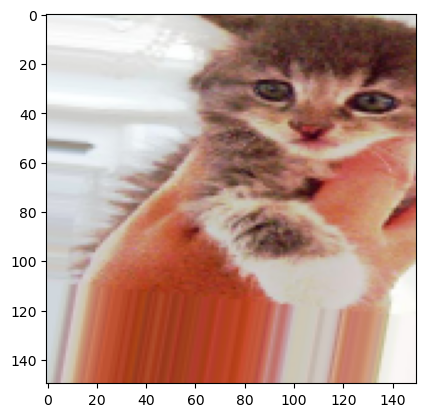

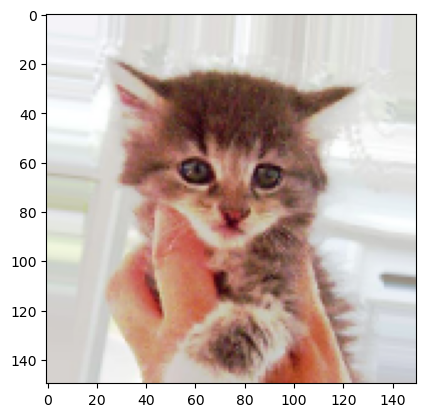

In [34]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### 程式 5.13 定義具有 Dropout 層的新卷積神經網路

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #  在這裡加入 Dropout 層 (丟棄 50 %)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


### 程式 5.14 使用資料擴增產生器來訓練卷積神經網路

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
    train_dir,    # 目標目錄
    target_size=(150, 150), # 所有圖像大小調整成 150×150 
    batch_size=32,
    class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# 訓練
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.6885 - acc: 0.5328WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


50/50 [==============================] - 28s 559ms/step - loss: 0.6885 - acc: 0.5328 - val_loss: 0.6858 - val_acc: 0.5860
Epoch 2/100
50/50 [==============================] - 24s 486ms/step - loss: 0.6876 - acc: 0.5492
Epoch 3/100
50/50 [==============================] - 24s 483ms/step - loss: 0.6822 - acc: 0.5619
Epoch 4/100
50/50 [==============================] - 24s 479ms/step - loss: 0.6777 - acc: 0.5688
Epoch 5/100
50/50 [==============================] - 24s 485ms/step - loss: 0.6720 - acc: 0.5794
Epoch 6/100
50/50 [==============================] - 24s 487ms/step - loss: 0.6626 - acc: 0.6029
Epoch 7/100
50/50 [==============================] - 26s 514ms/step - loss: 0.6714 - acc: 0.5884
Epoch 8/100
50/50 [==============================] - 30s 603ms/step - loss: 0.6660 - acc: 0.5903
Epoch 9/100
50/50 [==============================] - 28s 556ms/step - loss: 0.6626 - acc: 0.5865
Epoch 10/100
50/50 [==============================] - 26s 517ms/step - loss: 0.6560 - acc: 0.6124
Epoc

### 程式 5.15 儲存 model

In [41]:
model.save('cats_and_dogs_small_2.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 再次顯示訓練和驗證週期的損失值和準確度曲線

In [43]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

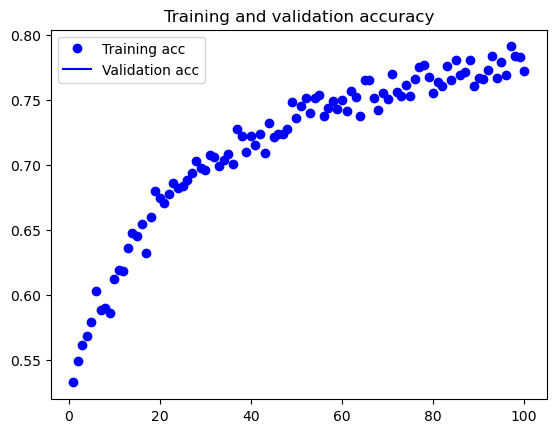

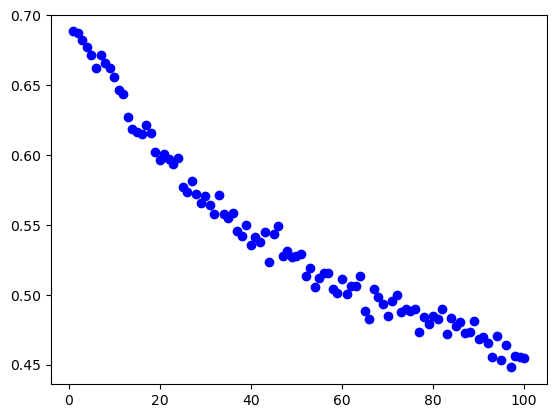

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(100, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 程式 5.20 繪製結果

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
""" 若你的 Keras 版本執行程式 5.23 後的結果與書上有所差異，請將程式 5.23 做以下的修改

這邊提供 2 種修改方式：

方式 1. 將 conv_base.trainable = False  註解掉。

方式 2. 餵給 VGG16 的圖片像素值不要壓到 0-1 之間，將 rescale=1./255 都註解掉，在程式 5.23 中做以下的修改：

from keras.applications.imagenet_utils import preprocess_input  # 新增這行

train_gen = ImageDataGenerator(
#     rescale=1.0/255,                       # 註解這行
    preprocessing_function=preprocess_input, # 新增這行
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='nearest'
)
#test_datagen = ImageDataGenerator(1./255)                                 # 註解這行
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # 新增這行

"""

#### 繪製結果

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()